# Data Mining Project - Laptop Prices
Group Members:
    Adam Schuller
    Alessandro Joabar
    Bogdan Constantinescu
    Bryan Duff

### Importing necessary modules

In [384]:
import pandas as pd
import numpy as np
import warnings
import re
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)


In [385]:
def FindString(text, pattern):
    if (re.search(pattern, text.lower()) != None): 
        result = 1
    else: 
        result = 0
    return(result)

def EncodeResolution(string):
    result = 0
    wordList = string.split() 
    for s in wordList:
        strList = s.split('x')
        if len(strList) == 2:
            if strList[0].isdigit() and strList[1].isdigit():
                result = int(strList[0] + str.zfill(strList[1],4))
    return(result)

def match_component(x, ref):
    x = x.lower().split(" ")
    best_match = 0
    name_match = ""
    for name in ref:
        og = name
        name = name.lower()
        name = name.replace('-', ' ')
        name = name.replace('@', ' ')
        y = name.split(' ')
        intersections = set(x).intersection(y)
        match_coeff = len(intersections)
        if match_coeff >= best_match: 
            name_match = og
            best_match = match_coeff
    return name_match

Importing Laptop data

In [386]:
laptops = pd.read_csv('laptops.csv', encoding='latin1')
laptops.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


Importing GPU data

In [387]:
gpu = pd.read_csv('GPU_ranks.csv')
gpu = gpu.drop(columns=['Unnamed: 5', 'Unnamed: 6'])
gpu.head()

,Videocard Name,Passmark G3D Mark,Rank,Videocard Value,usd
0,Radeon RX 6900 XT,26603,1,15.65,1699.98
1,GeForce RTX 3080 Ti,26477,2,14.96,"$1,769.99*"
2,GeForce RTX 3090,25845,3,8.07,"$3,202.99*"
3,GeForce RTX 3080,24408,4,5.55,"$4,399.99*"
4,RTX A5000,24150,5,NaN,NaN


Importing CPU data

In [388]:
cpu = pd.read_csv('CPU Ranks.csv')
cpu.head(50)

,CPU Name,CPU Mark (Higher is better),Rank (Lower is better),CPU Value (Higher is better),Price (USD)
0,AMD EPYC 7763,"87,767",1,NaN,NaN
1,AMD EPYC 7713,"85,859",2,NaN,NaN
2,AMD EPYC 7J13,"85,696",3,NaN,NaN
3,AMD Ryzen Threadripper PRO 3995WX,"85,506",4,15.59,"$5,484.99"
4,AMD Ryzen Threadripper 3990X,"81,261",5,19.25,"$4,222.22*"
5,AMD EPYC 7643,"77,101",6,NaN,NaN
6,AMD EPYC 7702,"71,686",7,8.43,"$8,499.00"
7,AMD EPYC 7662,"71,576",8,13.50,"$5,300.00*"
8,AMD Ryzen Threadripper 3970X,"64,107",9,25.54,"$2,510.20"
9,AMD EPYC 7742,"64,071",10,8.05,"$7,961.00"


## Cleaning all three sets of data

### Cleaning Laptop dataset

1. RAM
 - Removed string ‘GB’
 - Converted to numeric type
2. Weight
- Removed string ‘kg’
- Converted to numeric type
3. Price_dollars
- Converted from euros to USD
- Removed Price_euros


In [389]:
laptops['Ram'] = [pd.to_numeric(str(laptops['Ram'].iloc[x]).replace('GB','')) for x in range(len(laptops['Ram']))]
laptops['Weight'] = [pd.to_numeric(str(laptops['Ram'].iloc[x]).replace('kg','')) for x in range(len(laptops['Ram']))]
laptops['Price_dollars'] = round(laptops['Price_euros']*1.18,2)
laptops = laptops.drop('Price_euros',axis=1)

In [390]:
laptops['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Windows 10 S       8
Mac OS X           8
Android            2
Name: OpSys, dtype: int64

66 values have 'No OS' for it's operating system. We checked some of the laptop models that had 'No OS' specified, and from our research it seemed like a majority of these laptops did not actually come with an operating system installed. For example, when shopping for a Lenovo Thinkpad the user can decide whether they want to have Windows 10 or Chrome OS installed. Therefor
e, 'No OS' was a customization feature and we decided to keep this operating system category.

For Linux OS, only some computers come pre-installed with Linux. Others with Linux as their listed OS are only Linux compatible. Therefore, we searched the product name to see if it had 'Linux' in it. If it did, then we kept Linux as the operating system. If it didn't, we converted it to Windows 10.

In [391]:
laptops['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Windows 10 S       8
Mac OS X           8
Android            2
Name: OpSys, dtype: int64

Converted OpSys to ‘Windows 10’ if product name did not mention Linux. This was because computers were listed as Linux compatible, but did not necessarily have Linux pre-installed


In [392]:
laptops['OpSys'] = ['Windows 10' if laptops['OpSys'].iloc[x] == 'Linux' and 'Linux' not in laptops['Product'].iloc[x] else laptops['OpSys'].iloc[x] for x in range(len(laptops['OpSys']))]

Converted ‘Windows 10 S’ to ‘Windows 10’

In [393]:
laptops['OpSys'] = ['Windows 10' if laptops['OpSys'].iloc[x] == 'Windows 10 S' else laptops['OpSys'].iloc[x] for x in range(len(laptops['OpSys']))]

In [394]:
laptops['OpSys'].value_counts()

Windows 10    1137
No OS           66
Windows 7       45
Chrome OS       27
macOS           13
Mac OS X         8
Linux            5
Android          2
Name: OpSys, dtype: int64

Created dummy variables

In [395]:
df = pd.get_dummies(laptops['OpSys'])

Dropped ‘OpSys’ column

In [396]:
laptops = laptops.drop('OpSys',axis=1)

Merged dummy variables into laptops dataset

In [397]:
laptops = pd.concat([laptops, df], axis=1, join='inner')

Memory
- Removed string 'Flash Storage' in lieu of 'SSD'
- Split memory entries that have + into two strings (The + indiciated two harddrives)
- Created four new feature columns, 'Memory', 'Hybrid', 'SSD', 'HDD'
- 1 for Hybrid if memory has an SSD and HDD drive
- 1 for SSD if memory only contains SSD and 0 for Hybrid
- 1 for HDD if memory only contains HDD and 0 for Hybrid

In [398]:
laptops['Memory'] = [(laptops['Memory'].iloc[x]).replace(' Flash Storage',' SSD') for x in range(len(laptops['Memory']))]

In [399]:
laptops['Hybrid'] = [1 if 'Hybrid' in laptops['Memory'].iloc[x] or 'HDD' in laptops['Memory'].iloc[x] and 'SSD' in laptops['Memory'] else 0 for x in range(len(laptops['Memory']))]

In [400]:
laptops['SSD'] = [1 if 'SSD' in laptops['Memory'].iloc[x] and laptops['Hybrid'].iloc[x] != 1 else 0 for x in range(len(laptops['Memory']))]

In [401]:
laptops['HDD'] = [1 if 'HDD' in laptops['Memory'].iloc[x] and laptops['Hybrid'].iloc[x] != 1 else 0 for x in range(len(laptops['Memory']))]

Split Memory into two temporary columns:
- Memory 1 for harddrive 1 of 1 or harddrive 1 of 1
- Memory 2 for harddrive 2 of 2 or 0 if no second harddrive

In [402]:
laptops['Memory1'] = 0
laptops['Memory2'] = 0

In [403]:
for x in range(len(laptops['Memory'])):
    if '+' in laptops['Memory'].iloc[x]:
        split_string = laptops['Memory'].iloc[x].split("+",)
        if len(split_string) == 1:
            laptops['Memory1'].iloc[x] = split_string[0]
            laptops['Memory2'].iloc[x] = 0
        if len(split_string) == 2:
            laptops['Memory1'].iloc[x] = split_string[0]
            laptops['Memory2'].iloc[x] = split_string[1]
    else:
        laptops['Memory1'].iloc[x] = laptops['Memory'].iloc[x]
        laptops['Memory2'].iloc[x] = 0

Formatted both Memory1 and Memory2 to numeric values. '1TB' and '1.0TB' were replaced with 1000.

In [404]:
laptops['Memory1'] = [pd.to_numeric(str(laptops['Memory1'].iloc[x]).replace('GB','').replace(' ','').replace('1.0TB','1000').replace('1TB','1000').replace('SSD','').replace('HDD',''),errors = 'coerce') for x in range(len(laptops['Memory1']))]

In [405]:
laptops['Memory2'] = [pd.to_numeric(str(laptops['Memory2'].iloc[x]).replace('GB','').replace(' ','').replace('1.0TB','1000').replace('1TB','1000').replace('SSD','').replace('HDD',''),errors = 'coerce') for x in range(len(laptops['Memory2']))]

In [406]:
laptops['Memory1'].value_counts()

256.0     508
1000.0    241
128.0     177
512.0     140
500.0     132
32.0       45
64.0       17
16.0       10
180.0       5
8.0         1
240.0       1
Name: Memory1, dtype: int64

In [407]:
laptops['Memory2'].value_counts()

0.0       1095
1000.0     185
256.0        3
500.0        2
512.0        1
Name: Memory2, dtype: int64

Converted original Memory feature to sum of both Memory1 and Memory2 to achieve total harddrive space.

In [408]:
laptops['Memory'] = laptops['Memory1'] + laptops['Memory2']

Dropped temporary Memory1 and Memory2 features.

In [409]:
laptops = laptops.drop('Memory1',axis=1)
laptops = laptops.drop('Memory2',axis=1)

In [410]:
laptops.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price_dollars,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 7,macOS,Hybrid,SSD,HDD
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128.0,Intel Iris Plus Graphics 640,8,1580.83,0,0,0,0,0,0,0,1,0,1,0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128.0,Intel HD Graphics 6000,8,1060.75,0,0,0,0,0,0,0,1,0,1,0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256.0,Intel HD Graphics 620,8,678.50,0,0,0,0,1,0,0,0,0,1,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512.0,AMD Radeon Pro 455,16,2994.19,0,0,0,0,0,0,0,1,0,1,0
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256.0,Intel Iris Plus Graphics 650,8,2128.25,0,0,0,0,0,0,0,1,0,1,0


Screen Resolution.  
Combined HRez and VRez into one integer and stored in new column, Resolution  
Created dummy variables IsIPS and IsTouchscreen

In [411]:
laptops['IsIPS'] = laptops['ScreenResolution'].apply(FindString, args=('ips',))
laptops['IsTouchscreen'] = laptops['ScreenResolution'].apply(FindString, args=('touchscreen',))
laptops['Resolution'] = laptops['ScreenResolution'].apply(EncodeResolution)
laptops = laptops.drop('ScreenResolution',axis=1)

In [412]:
laptops = laptops.drop('Unnamed: 0',axis=1)

In [413]:
laptops.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,Weight,Price_dollars,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 7,macOS,Hybrid,SSD,HDD,IsIPS,IsTouchscreen,Resolution
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128.0,Intel Iris Plus Graphics 640,8,1580.83,0,0,0,0,0,0,0,1,0,1,0,1,0,25601600
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128.0,Intel HD Graphics 6000,8,1060.75,0,0,0,0,0,0,0,1,0,1,0,0,0,14400900
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256.0,Intel HD Graphics 620,8,678.50,0,0,0,0,1,0,0,0,0,1,0,0,0,19201080
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512.0,AMD Radeon Pro 455,16,2994.19,0,0,0,0,0,0,0,1,0,1,0,1,0,28801800
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256.0,Intel Iris Plus Graphics 650,8,2128.25,0,0,0,0,0,0,0,1,0,1,0,1,0,25601600


### Cleaning GPU dataset

In [414]:
gpu.head()

,Videocard Name,Passmark G3D Mark,Rank,Videocard Value,usd
0,Radeon RX 6900 XT,26603,1,15.65,1699.98
1,GeForce RTX 3080 Ti,26477,2,14.96,"$1,769.99*"
2,GeForce RTX 3090,25845,3,8.07,"$3,202.99*"
3,GeForce RTX 3080,24408,4,5.55,"$4,399.99*"
4,RTX A5000,24150,5,NaN,NaN


In [415]:
gpu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2361 entries, 0 to 2360
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Videocard Name     2313 non-null   object
 1   Passmark G3D Mark  2320 non-null   object
 2   Rank               2320 non-null   object
 3   Videocard Value    611 non-null    object
 4   usd                611 non-null    object
dtypes: object(5)
memory usage: 92.4+ KB


Cleaned GPU data, converting object types to integers.

In [416]:
gpu = gpu[(gpu['Videocard Name'] != 'Videocard Name')]
gpu.dropna(subset=['Videocard Name'], inplace = True)

gpu['Passmark G3D Mark'] = pd.to_numeric(gpu['Passmark G3D Mark'])
gpu['Rank'] = [pd.to_numeric(str(gpu['Rank'].iloc[x])) if gpu['Rank'].iloc[x] == gpu['Rank'].iloc[x] else np.nan for x in range(len(gpu['Rank']))]
gpu['Videocard Value'] = [pd.to_numeric(str(gpu['Videocard Value'].iloc[x])) if gpu['Videocard Value'].iloc[x] == gpu['Videocard Value'].iloc[x] else np.nan for x in range(len(gpu['Videocard Value']))]
gpu['usd'] = [pd.to_numeric(str(gpu['usd'].iloc[x]).replace('$','').replace('*','').replace(',','').replace('Price','').replace('(USD)','')) if gpu['usd'].iloc[x] == gpu['usd'].iloc[x] else np.nan for x in range(len(gpu['usd']))]

In [417]:
gpu.head()

,Videocard Name,Passmark G3D Mark,Rank,Videocard Value,usd
0,Radeon RX 6900 XT,26603.0,1.0,15.65,1699.98
1,GeForce RTX 3080 Ti,26477.0,2.0,14.96,1769.99
2,GeForce RTX 3090,25845.0,3.0,8.07,3202.99
3,GeForce RTX 3080,24408.0,4.0,5.55,4399.99
4,RTX A5000,24150.0,5.0,NaN,NaN


In [418]:
gpu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2268 entries, 0 to 2360
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Videocard Name     2268 non-null   object 
 1   Passmark G3D Mark  2230 non-null   float64
 2   Rank               2230 non-null   float64
 3   Videocard Value    521 non-null    float64
 4   usd                521 non-null    float64
dtypes: float64(4), object(1)
memory usage: 106.3+ KB


### Cleaning CPU dataset

In [419]:
cpu.head()

,CPU Name,CPU Mark (Higher is better),Rank (Lower is better),CPU Value (Higher is better),Price (USD)
0,AMD EPYC 7763,"87,767",1,NaN,NaN
1,AMD EPYC 7713,"85,859",2,NaN,NaN
2,AMD EPYC 7J13,"85,696",3,NaN,NaN
3,AMD Ryzen Threadripper PRO 3995WX,"85,506",4,15.59,"$5,484.99"
4,AMD Ryzen Threadripper 3990X,"81,261",5,19.25,"$4,222.22*"


CPU Data
- Converted Price to numeric type, removing all '$' and '*' within strings.
- The same was done for CPU Mark, Rank, and CPU Value.

In [420]:
cpu['Price (USD)'] = [pd.to_numeric(str(cpu['Price (USD)'].iloc[x]).replace('$','').replace('*','').replace(',','').replace('Price','').replace('(USD)','')) if cpu['Price (USD)'].iloc[x] == cpu['Price (USD)'].iloc[x] else np.nan for x in range(len(cpu['Price (USD)']))]
cpu['CPU Mark (Higher is better)'] = [pd.to_numeric(str(cpu['CPU Mark (Higher is better)'].iloc[x]).replace(',','')) if cpu['CPU Mark (Higher is better)'].iloc[x] == cpu['CPU Mark (Higher is better)'].iloc[x] else np.nan for x in range(len(cpu['CPU Mark (Higher is better)']))]
cpu['CPU Value (Higher is better)'] = [pd.to_numeric(str(cpu['CPU Value (Higher is better)'].iloc[x])) if cpu['CPU Value (Higher is better)'].iloc[x] == cpu['CPU Value (Higher is better)'].iloc[x] else np.nan for x in range(len(cpu['CPU Value (Higher is better)']))]

In [421]:
cpu['CPU Name'] = [cpu['CPU Name'].iloc[x].replace('@','') for x in range(len(cpu['CPU Name']))]

Created 2 temporary CPU columns: CPU Type and CPU GHz.
- Split CPU by '-' and cleaned each individual column.

In [422]:
cpu['CPU Type'] = 0
cpu['CPU Ghz'] = 0

In [423]:
for x in range(len(cpu['CPU Name'])):
    if ' ' in cpu['CPU Name'].iloc[x]:
        split_string = cpu['CPU Name'].iloc[x].split("-",)
        if len(split_string) == 1:
            cpu['CPU Type'].iloc[x] = split_string[0]
            cpu['CPU Ghz'].iloc[x] = ''
        if len(split_string) == 2:
            cpu['CPU Type'].iloc[x] = split_string[0]
            cpu['CPU Ghz'].iloc[x] = split_string[1]
    else:
        cpu['CPU Type'].iloc[x] = cpu['CPU Name'].iloc[x]
        cpu['CPU Ghz'].iloc[x] = ''

In [424]:
for x in range(len(cpu['CPU Ghz'])):
    if type(cpu['CPU Ghz'].iloc[x]) == str:
        if '  ' in cpu['CPU Ghz'].iloc[x]:
            split_string = cpu['CPU Ghz'].iloc[x].split("  ",)
            if len(split_string) == 2:
                cpu['CPU Ghz'].iloc[x] = split_string[1]
        else:
            cpu['CPU Ghz'].iloc[x] = cpu['CPU Ghz'].iloc[x]

In [425]:
cpu.head()

,CPU Name,CPU Mark (Higher is better),Rank (Lower is better),CPU Value (Higher is better),Price (USD),CPU Type,CPU Ghz
0,AMD EPYC 7763,87767,1,NaN,NaN,AMD EPYC 7763,
1,AMD EPYC 7713,85859,2,NaN,NaN,AMD EPYC 7713,
2,AMD EPYC 7J13,85696,3,NaN,NaN,AMD EPYC 7J13,
3,AMD Ryzen Threadripper PRO 3995WX,85506,4,15.59,5484.99,AMD Ryzen Threadripper PRO 3995WX,
4,AMD Ryzen Threadripper 3990X,81261,5,19.25,4222.22,AMD Ryzen Threadripper 3990X,


Replaced CPU Name with 'CPU Type' and 'CPU GHz', adding a ' ' inbetween.
- This achieved a reformatting from 'Intel Core i9-9980XE @ 3.00GHz' to 'Intel Core i9 3.00Ghz'

In [426]:
cpu['CPU Name'] = cpu['CPU Type'].astype(str) + ' ' + cpu['CPU Ghz'].astype(str)

In [427]:
cpu = cpu.drop('CPU Type',axis=1)
cpu = cpu.drop('CPU Ghz',axis=1)

In [428]:
cpu.head()

,CPU Name,CPU Mark (Higher is better),Rank (Lower is better),CPU Value (Higher is better),Price (USD)
0,AMD EPYC 7763,87767,1,NaN,NaN
1,AMD EPYC 7713,85859,2,NaN,NaN
2,AMD EPYC 7J13,85696,3,NaN,NaN
3,AMD Ryzen Threadripper PRO 3995WX,85506,4,15.59,5484.99
4,AMD Ryzen Threadripper 3990X,81261,5,19.25,4222.22


## Laptops CPU

Laptop CPU speeds only had 2 significant figures, added an additional 0 for match purposes.

In [429]:
laptops['Cpu'] = [str(laptops['Cpu'].iloc[x]).replace('GHz','0GHz') for x in range(len(laptops['Cpu']))]

In [430]:
laptops['CPU Mark (Higher is better)'] = 0
laptops['Rank (Lower is better)'] = 0 
laptops['CPU Value (Higher is better)'] = 0

In [431]:
laptops.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,Weight,Price_dollars,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 7,macOS,Hybrid,SSD,HDD,IsIPS,IsTouchscreen,Resolution,CPU Mark (Higher is better),Rank (Lower is better),CPU Value (Higher is better)
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.30GHz,8,128.0,Intel Iris Plus Graphics 640,8,1580.83,0,0,0,0,0,0,0,1,0,1,0,1,0,25601600,0,0,0
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.80GHz,8,128.0,Intel HD Graphics 6000,8,1060.75,0,0,0,0,0,0,0,1,0,1,0,0,0,14400900,0,0,0
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.50GHz,8,256.0,Intel HD Graphics 620,8,678.50,0,0,0,0,1,0,0,0,0,1,0,0,0,19201080,0,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.70GHz,16,512.0,AMD Radeon Pro 455,16,2994.19,0,0,0,0,0,0,0,1,0,1,0,1,0,28801800,0,0,0
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.10GHz,8,256.0,Intel Iris Plus Graphics 650,8,2128.25,0,0,0,0,0,0,0,1,0,1,0,1,0,25601600,0,0,0


In [432]:
laptops['Cpu2'] = laptops['Cpu'].apply(lambda x: match_component(x, cpu['CPU Name']))
laptops['Gpu2'] = laptops['Gpu'].apply(lambda x: match_component(x, gpu['Videocard Name']))

In [433]:
gpus = dict({})
cpus = dict({})

for x in cpu.values:
    cpus[x[0]] = x[2]
for x in gpu.values:
    gpus[x[0]] = x[2]
    
laptops['CPU_Rank'] = laptops['Cpu2'].apply(lambda x: cpus[x])
laptops['GPU_Rank'] = laptops['Gpu2'].apply(lambda x: gpus[x])

laptops = laptops.drop(columns = ['Cpu2', 'Gpu2'])

## Data Modeling

In [434]:
laptops.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,Weight,Price_dollars,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 7,macOS,Hybrid,SSD,HDD,IsIPS,IsTouchscreen,Resolution,CPU Mark (Higher is better),Rank (Lower is better),CPU Value (Higher is better),CPU_Rank,GPU_Rank
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.30GHz,8,128.0,Intel Iris Plus Graphics 640,8,1580.83,0,0,0,0,0,0,0,1,0,1,0,1,0,25601600,0,0,0,1860,634.0
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.80GHz,8,128.0,Intel HD Graphics 6000,8,1060.75,0,0,0,0,0,0,0,1,0,1,0,0,0,14400900,0,0,0,1899,865.0
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.50GHz,8,256.0,Intel HD Graphics 620,8,678.50,0,0,0,0,1,0,0,0,0,1,0,0,0,19201080,0,0,0,1918,814.0
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.70GHz,16,512.0,AMD Radeon Pro 455,16,2994.19,0,0,0,0,0,0,0,1,0,1,0,1,0,28801800,0,0,0,1629,338.0
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.10GHz,8,256.0,Intel Iris Plus Graphics 650,8,2128.25,0,0,0,0,0,0,0,1,0,1,0,1,0,25601600,0,0,0,1212,562.0


In [435]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Company                       1303 non-null   object 
 1   Product                       1303 non-null   object 
 2   TypeName                      1303 non-null   object 
 3   Inches                        1303 non-null   float64
 4   Cpu                           1303 non-null   object 
 5   Ram                           1303 non-null   int64  
 6   Memory                        1260 non-null   float64
 7   Gpu                           1303 non-null   object 
 8   Weight                        1303 non-null   int64  
 9   Price_dollars                 1303 non-null   float64
 10  Android                       1303 non-null   uint8  
 11  Chrome OS                     1303 non-null   uint8  
 12  Linux                         1303 non-null   uint8  
 13  Mac

In [436]:
#preserve companies for hierarchical clustering
laptop_company = laptops['Company']
laptop_product = laptops['Product']

In [437]:
df = pd.get_dummies(laptops['Company'])
laptops = laptops.drop('Company',axis=1)
laptops = pd.concat([laptops, df], axis=1, join='inner')

In [438]:
laptops['Inches'] = [pd.to_numeric(str(laptops['Inches'].iloc[x])) for x in range(len(laptops['Inches']))]

In [439]:
df = pd.get_dummies(laptops['TypeName'])
laptops = laptops.drop('TypeName',axis=1)
laptops = pd.concat([laptops, df], axis=1, join='inner')

In [440]:
laptops['Memory'].isna().sum()

43

In [441]:
#laptops.info()

In [442]:
laptops['Memory'] = laptops['Memory'].fillna(value=laptops['Memory'].mean())

# instead of filling with mean value, let's frop these records
#laptops = laptops.dropna(subset=['Memory'], axis=0)

In [443]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Product                       1303 non-null   object 
 1   Inches                        1303 non-null   float64
 2   Cpu                           1303 non-null   object 
 3   Ram                           1303 non-null   int64  
 4   Memory                        1303 non-null   float64
 5   Gpu                           1303 non-null   object 
 6   Weight                        1303 non-null   int64  
 7   Price_dollars                 1303 non-null   float64
 8   Android                       1303 non-null   uint8  
 9   Chrome OS                     1303 non-null   uint8  
 10  Linux                         1303 non-null   uint8  
 11  Mac OS X                      1303 non-null   uint8  
 12  No OS                         1303 non-null   uint8  
 13  Win

In [444]:
#Dropped because all string type
laptops = laptops.drop('Cpu',axis=1)
#laptops = laptops.drop('Unnamed: 0',axis=1)

laptops = laptops.drop('Product',axis=1)

#laptops = laptops.drop('ScreenResolution',axis=1)
laptops = laptops.drop('Gpu',axis=1)

#Bad data (sparse)
laptops = laptops.drop('CPU Mark (Higher is better)',axis=1)
laptops = laptops.drop('Rank (Lower is better)',axis=1)
laptops = laptops.drop('CPU Value (Higher is better)',axis=1)

In [445]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Inches              1303 non-null   float64
 1   Ram                 1303 non-null   int64  
 2   Memory              1303 non-null   float64
 3   Weight              1303 non-null   int64  
 4   Price_dollars       1303 non-null   float64
 5   Android             1303 non-null   uint8  
 6   Chrome OS           1303 non-null   uint8  
 7   Linux               1303 non-null   uint8  
 8   Mac OS X            1303 non-null   uint8  
 9   No OS               1303 non-null   uint8  
 10  Windows 10          1303 non-null   uint8  
 11  Windows 7           1303 non-null   uint8  
 12  macOS               1303 non-null   uint8  
 13  Hybrid              1303 non-null   int64  
 14  SSD                 1303 non-null   int64  
 15  HDD                 1303 non-null   int64  
 16  IsIPS 

In [446]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

from sklearn.utils import check_random_state
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from nose.tools import assert_equal, assert_is_instance, assert_true, assert_is_not
from numpy.testing import assert_array_equal, assert_array_almost_equal, assert_almost_equal

## Auto ML

In [447]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Inches              1303 non-null   float64
 1   Ram                 1303 non-null   int64  
 2   Memory              1303 non-null   float64
 3   Weight              1303 non-null   int64  
 4   Price_dollars       1303 non-null   float64
 5   Android             1303 non-null   uint8  
 6   Chrome OS           1303 non-null   uint8  
 7   Linux               1303 non-null   uint8  
 8   Mac OS X            1303 non-null   uint8  
 9   No OS               1303 non-null   uint8  
 10  Windows 10          1303 non-null   uint8  
 11  Windows 7           1303 non-null   uint8  
 12  macOS               1303 non-null   uint8  
 13  Hybrid              1303 non-null   int64  
 14  SSD                 1303 non-null   int64  
 15  HDD                 1303 non-null   int64  
 16  IsIPS 

In [448]:
laptops['Inches'] = laptops['Inches'].astype(int)
laptops['Memory'] = laptops['Memory'].astype(int)
laptops['Price_dollars'] = laptops['Price_dollars'].astype(int)

In [449]:
# Check the number of nulls
laptops['GPU_Rank'].isna().sum()

2

In [450]:
# Fill in with mode
laptops['GPU_Rank'] = laptops['GPU_Rank'].fillna(value=laptops['GPU_Rank'].mean())

# Drop the null records
#laptops = laptops.dropna(subset=['GPU_Rank'], axis=0)

In [451]:
# Save a copy of the df
laptops_saved = laptops.copy(deep=True)

In [459]:
#laptops = laptops_saved.copy(deep=True)

In [287]:
# Drop the Hybrid column
#laptops = laptops.drop('Hybrid',axis=1)

In [460]:
laptops2 = laptops.copy(deep=True)

In [527]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

def build_models_on_train(df, model, X_train, X_test, y_train, y_test):   
    classifier = model()
    classifier.fit(X_train, y_train)
    return classifier

def select_best_model_score(df):
    # Partition data into features and labels
    feature_cols = df.columns[df.columns != 'Price_dollars']
    X = df[feature_cols] # Features
    y = df.Price_dollars # Label
    
    # Create train and test segments
    from sklearn.model_selection import train_test_split
    #X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0,shuffle=True)
    
#     models_to_run = [LogisticRegression, LinearSVC, MLPRegressor, 
#                  DecisionTreeRegressor, RandomForestRegressor, GaussianNB,
#                 Perceptron, MLPRegressor, SGDRegressor]
    
    models_to_run = [LogisticRegression, MLPRegressor, 
                 DecisionTreeRegressor, RandomForestRegressor, MLPRegressor, SGDRegressor]
    
    # Score tracking
    max_score = 0
    max_build = 0
    max_RMSE = 999
    
    for algo in models_to_run:
        build = build_models_on_train(df, algo, X_train, X_test, y_train, y_test)
        pred = build.predict(X_test)
        RMSE = np.sqrt(metrics.mean_squared_error(y_test, pred))


        if RMSE < max_RMSE:
            max_score = build.score(X_test, y_test)
            max_build = build
            max_RMSE = RMSE        
    predicted = max_build.predict(X_test)
    
    print()
    print("Best build model is: ")
    print(max_build)
    print("Build model score (Accuracy): " + str(max_score))
    print("MAE = {:5.4f}".format(metrics.mean_absolute_error(y_test, predicted)))
    print("MSE = {:5.4f}".format(metrics.mean_squared_error(y_test, predicted)))
    print("RMSE = {:5.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))
    #print("Accuracy:",metrics.accuracy_score(y_test, predicted))
    
    output = pd.DataFrame()
    inp = pd.DataFrame()
    inp['Price_dollars'] = y_test
    output['Price_dollars'] = predicted
    sns.distplot(inp['Price_dollars'])
    sns.distplot(output['Price_dollars']).set_title(str(max_build) + " Test vs. Predicted")

    return max_build, predicted


Best build model is: 
RandomForestRegressor()
Build model score (Accuracy): 0.796632243755125
MAE = 243.0388
MSE = 151736.9193
RMSE = 389.5342


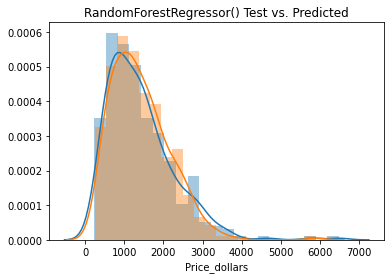

In [528]:
mk1 = select_best_model_score(laptops)

## K Means

In [463]:
laptops.head()

,Inches,Ram,Memory,Weight,Price_dollars,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 7,macOS,Hybrid,SSD,HDD,IsIPS,IsTouchscreen,Resolution,CPU_Rank,GPU_Rank,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,HP,Huawei,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
0,13,8,128,8,1580,0,0,0,0,0,0,0,1,0,1,0,1,0,25601600,1860,634.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,13,8,128,8,1060,0,0,0,0,0,0,0,1,0,1,0,0,0,14400900,1899,865.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,15,8,256,8,678,0,0,0,0,1,0,0,0,0,1,0,0,0,19201080,1918,814.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,15,16,512,16,2994,0,0,0,0,0,0,0,1,0,1,0,1,0,28801800,1629,338.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,13,8,256,8,2128,0,0,0,0,0,0,0,1,0,1,0,1,0,25601600,1212,562.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


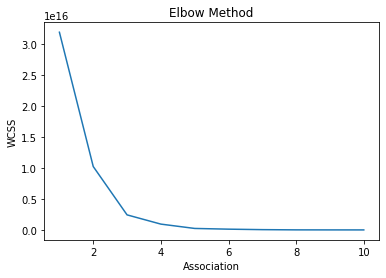

In [464]:
#import warnings
#warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans

stscaler = StandardScaler().fit(laptops)
dataset = stscaler.transform(laptops)

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(laptops)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Association')
plt.ylabel('WCSS')
plt.show() 

kmeans_laptops = KMeans(n_clusters = 3, random_state = 55).fit(laptops)

y_kmeans = kmeans_laptops.predict(laptops)
labels = kmeans_laptops.labels_

Text(0, 0.5, 'Price in $')

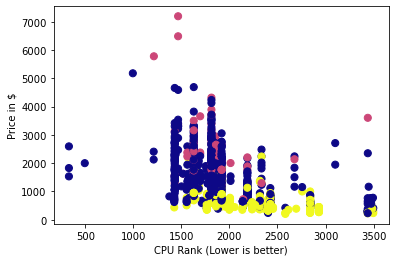

In [641]:
plt.scatter(laptops2['CPU_Rank'], laptops2['Price_dollars'], c=y_kmeans, s=50, cmap='plasma')
plt.xlabel("CPU Rank (Lower is better)")
plt.ylabel("Price in $")

Text(0, 0.5, 'Price in $')

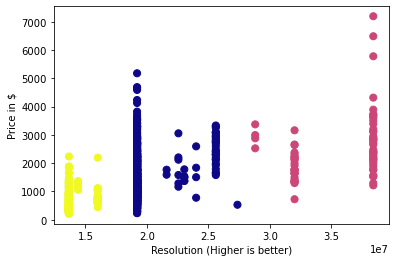

In [715]:
plt.scatter(laptops2['Resolution'], laptops2['Price_dollars'], c=y_kmeans, s=50, cmap='plasma')
plt.xlabel("Resolution (Higher is better)")
plt.ylabel("Price in $")

In [467]:
df = pd.DataFrame(kmeans_laptops.labels_,columns = ['KMeans Label'])
df1 = pd.DataFrame(laptop_company, columns = ['Company'])
df2 = pd.DataFrame(laptop_product, columns = ['Product'])

In [468]:
laptops2 = pd.concat([laptops2, df], axis=1, join='inner')
laptops2 = pd.concat([laptops2, df1], axis=1, join='inner')
laptops2 = pd.concat([laptops2, df2], axis=1, join='inner')

In [643]:
laptops2

,Inches,Ram,Memory,Weight,Price_dollars,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 7,macOS,Hybrid,SSD,HDD,IsIPS,IsTouchscreen,Resolution,CPU_Rank,GPU_Rank,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,HP,Huawei,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,KMeans Label,Company,Product,DBSCAN Label
0,13,8,128,8,1580,0,0,0,0,0,0,0,1,0,1,0,1,0,25601600,1860,634.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Apple,MacBook Pro,-1
1,13,8,128,8,1060,0,0,0,0,0,0,0,1,0,1,0,0,0,14400900,1899,865.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,Apple,Macbook Air,-1
2,15,8,256,8,678,0,0,0,0,1,0,0,0,0,1,0,0,0,19201080,1918,814.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,HP,250 G6,-1
3,15,16,512,16,2994,0,0,0,0,0,0,0,1,0,1,0,1,0,28801800,1629,338.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,Apple,MacBook Pro,-1
4,13,8,256,8,2128,0,0,0,0,0,0,0,1,0,1,0,1,0,25601600,1212,562.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Apple,MacBook Pro,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14,4,128,4,752,0,0,0,0,0,1,0,0,0,1,0,1,1,19201080,1919,858.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Lenovo,Yoga 500-14ISK,-1
1299,13,16,512,16,1768,0,0,0,0,0,1,0,0,0,1,0,1,1,32001800,1919,858.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,Lenovo,Yoga 900-13ISK,-1
1300,14,2,64,2,270,0,0,0,0,0,1,0,0,0,1,0,0,0,13660768,2931,814.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,Lenovo,IdeaPad 100S-14IBR,-1
1301,15,6,1000,6,901,0,0,0,0,0,1,0,0,0,0,1,0,0,13660768,1919,1114.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,1


#### Lower CPU_Rank is better

### KMeans, cluster 0

#### High Budget

In [482]:
laptops2[laptops2['KMeans Label'] == 0]['Price_dollars'].mean()

1476.9306487695749

In [471]:
laptops2[laptops2['KMeans Label'] == 0]['CPU_Rank'].mean()

1903.7774049217003

In [472]:
laptops2[laptops2['KMeans Label'] == 0]['GPU_Rank'].mean()

695.8274688030373

In [484]:
laptops2[laptops2['KMeans Label'] == 0]['Resolution'].mode()

0    19201080
dtype: int64

In [485]:
laptops2[laptops2['KMeans Label'] == 0]['Product'].value_counts()

Legion Y520-15IKBN                       19
Inspiron 5570                            18
XPS 13                                   13
Inspiron 3567                            12
ThinkPad X1                              12
                                         ..
Tecra A50-D-11D                           1
Inspiron 7559                             1
15-bs018nq (i3-6006U/4GB/500GB/FHD/No     1
ZenBook Pro                               1
GT80S 6QF-074US                           1
Name: Product, Length: 461, dtype: int64

In [506]:
laptops2[laptops2['KMeans Label'] == 0][['Product','Price_dollars','CPU_Rank']].sort_values(by=['Price_dollars','CPU_Rank'],ascending = True)

,Product,Price_dollars,CPU_Rank
1120,V131 (X5-Z8350/4GB/32GB/FHD/W10),231,3439
791,K146 (N3350/4GB/32GB/W10),239,2402
626,SmartBook 140,282,3439
30,"LapBook 15.6""",289,3439
483,"Lapbook 15,6",293,3439
...,...,...,...
780,Alienware 17,4234,1813
238,ROG G703VI-E5062T,4590,1466
1136,ZBook 17,4660,1431
1066,ROG G701VO,4690,1629


In [993]:
laptops2[(laptops2['KMeans Label'] == 0) & (laptops2['Price_dollars'] < 1480)][['Product','Price_dollars','Resolution']].sort_values(by=['Price_dollars','Resolution'],ascending = False)

,Product,Price_dollars,Resolution
150,Inspiron 5577,1474,19201080
99,Omen 15-ce007nv,1473,19201080
710,Legion Y520-15IKBN,1473,19201080
396,ThinkPad E580,1450,19201080
660,Latitude E7470,1450,19201080
...,...,...,...
575,SmartBook 141,293,19201080
30,"LapBook 15.6""",289,19201080
626,SmartBook 140,282,19201080
791,K146 (N3350/4GB/32GB/W10),239,19201080


In [615]:
#laptops2[(laptops2['KMeans Label'] == 0 & laptops2['Price_dollars'] >= 1200)]

### KMeans, cluster 1

#### Medium Budget

In [475]:
laptops2[laptops2['KMeans Label'] == 1]['Price_dollars'].mean()

2500.8513513513512

In [476]:
laptops2[laptops2['KMeans Label'] == 1]['CPU_Rank'].mean()

1810.6216216216217

In [477]:
laptops2[laptops2['KMeans Label'] == 1]['GPU_Rank'].mean()

635.1351351351351

In [487]:
laptops2[laptops2['KMeans Label'] == 1]['Resolution'].mode()

0    38402160
dtype: int64

In [478]:
laptops2[laptops2['KMeans Label'] == 1]['Product'].value_counts()

XPS 13                               17
XPS 15                                6
Yoga 900-13ISK                        5
Alienware 17                          4
MacBook Pro                           4
Spectre x360                          4
Yoga 920-13IKB                        2
Blade Stealth                         2
Blade Pro                             2
EliteBook 1030                        2
Inspiron 7567                         2
EliteBook Folio                       1
GS73VR Stealth                        1
Thinkpad P50                          1
ZenBook UX310UA-FB485T                1
Precision 7520                        1
Thinkpad P51                          1
Yoga 720-15IKB                        1
Alienware 15                          1
Precision M5520                       1
GS63VR 7RF                            1
Envy x360                             1
ThinkPad P70                          1
Q534UX-BHI7T19 (i7-7500U/16GB/2TB     1
Zenbook UX510UW-FI095T                1


In [479]:
laptops2[laptops2['KMeans Label'] == 1][['Product','Price_dollars','CPU_Rank']].sort_values(by=['Price_dollars','CPU_Rank'],ascending = True)

,Product,Price_dollars,CPU_Rank
1088,Chromebook 13,725,2144
1117,Blade Stealth,1214,1919
767,Inspiron 7559,1296,1431
1188,XPS 13,1296,2334
763,Zenbook UX330UA-AH5Q,1332,1918
...,...,...,...
744,Thinkpad P51s,3892,1813
723,Alienware 17,4318,1813
610,Thinkpad P51,5780,1214
830,Blade Pro,6488,1466


In [508]:
laptops2[(laptops2['KMeans Label'] == 0) & (laptops2['Price_dollars'] < 2550)][['Product','Price_dollars','Resolution']].sort_values(by=['Price_dollars','Resolution'],ascending = False)

,Product,Price_dollars,Resolution
1178,GS60 Ghost,2540,19201080
1197,Rog G752VY-GC229T,2537,19201080
388,Precision 5520,2519,19201080
301,Rog GL702VS-GC095T,2503,19201080
1045,EliteBook 850,2481,19201080
...,...,...,...
575,SmartBook 141,293,19201080
30,"LapBook 15.6""",289,19201080
626,SmartBook 140,282,19201080
791,K146 (N3350/4GB/32GB/W10),239,19201080


### KMeans, cluster 2

#### Low Budget

In [480]:
laptops2[laptops2['KMeans Label'] == 2]['Price_dollars'].mean()

661.5253731343283

In [361]:
laptops2[laptops2['KMeans Label'] == 2]['CPU_Rank'].mean()

2037.9685534591194

In [488]:
laptops2[laptops2['KMeans Label'] == 2]['GPU_Rank'].mean()

966.1432835820896

In [489]:
laptops2[laptops2['KMeans Label'] == 2]['Resolution'].mode()

0    13660768
dtype: int64

In [363]:
laptops2[laptops2['KMeans Label'] == 2]['Product'].value_counts()

XPS 13                                     13
250 G6                                     11
Inspiron 3567                               6
Vostro 3568                                 5
Aspire 3                                    5
                                           ..
V330-15IKB (i3-7130U/4GB/128GB/FHD/W10)     1
V330-15IKB (i7-8550U/8GB/256GB/FHD/W10)     1
Tecra X40-D-10G                             1
Ideapad 320-15IKBR                          1
R417NA-RS01 (N3350/4GB/32GB/W10)            1
Name: Product, Length: 220, dtype: int64

In [369]:
laptops2[laptops2['KMeans Label'] == 2][['Product','Price_dollars','CPU_Rank']].sort_values(by=['Price_dollars','CPU_Rank'],ascending = True)

,Product,Price_dollars,CPU_Rank
20,Vivobook E200HA,226,3439
31,E402WA-GA010T (E2-6110/2GB/32GB/W10),234,3497
791,K146 (N3350/4GB/32GB/W10),239,2402
1041,V142 (X5-Z8350/2GB/32GB/W10),248,3439
35,IdeaPad 120S-14IAP,293,2402
...,...,...,...
911,Elitebook Folio,3658,1696
1231,Blade Pro,4128,1813
723,Alienware 17,4318,1813
1066,ROG G701VO,4690,1629


In [510]:
laptops2[(laptops2['KMeans Label'] == 2) & (laptops2['Price_dollars'] < 655)][['Product','Price_dollars','Resolution']].sort_values(by=['Price_dollars','Resolution'],ascending = False)

,Product,Price_dollars,Resolution
376,Yoga 11e,652,13660768
303,IdeaPad 320-15IKBN,647,13660768
326,Aspire E5-575,647,13660768
1002,Vostro 3568,645,13660768
687,Inspiron 3567,643,13660768
...,...,...,...
1296,Stream 11-Y000na,246,13660768
31,E402WA-GA010T (E2-6110/2GB/32GB/W10),234,13660768
290,Chromebook C910-C2ST,234,13660768
20,Vivobook E200HA,226,13660768


## Hierarchical Clustering

In [370]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import normalize

In [529]:
pd.set_option('display.expand_frame_repr', False)


laptops = normalize(laptops)

mergings = linkage(laptops, method='ward')
cluster_names = fcluster(mergings, 10, criterion='distance')


plt.figure(figsize=(100,15))

dendrogram(mergings,
    labels=laptop_company.values,
    leaf_rotation=135,
    leaf_font_size=10)

plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 7200x1080 with 0 Axes>

## DBSCAN

In [548]:
from sklearn.preprocessing import StandardScaler
#from sklearn.utils import check_random_state
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [697]:
def plot_naive_variance(pca):
    figure1, ax = plt.subplots()
    ax.plot(list(range(pca.n_components_)), pca.explained_variance_ratio_)
    
    ax.set(xlabel='Dimension #', ylabel='Explained Variance Ratio',
           title='Fraction of Explained Variance - Naive')
    
    figure1.set_size_inches(10,6)
    plt.show() 

    return ax

def standardize(df):
    # Perform standardization by centering and scaling:
    result = StandardScaler().fit_transform(df)
    return result

def reduce(pca, array):
    # Perform dim reduction by pca
    result = pca.fit_transform(array)   
    return result

def fit_pca(df, n_components):
    # Fits a PCA model on df; keeps n_components
    pca = PCA(n_components)
    pca.fit(df)
    return pca

def plot_scaled_variance(pca):
    figure2, ax = plt.subplots()
    ax.plot(list(range(pca.n_components_)), pca.explained_variance_ratio_)
    
    ax.set(xlabel='Dimension #', ylabel='Explained Variance Ratio',
           title='Fraction of Explained Variance - Scaled')
    
    figure2.set_size_inches(10,6)
    plt.show()     
        
    return ax


In [698]:
# PCA naive approach (attributes are not scaled)
pca_naive_laptops = fit_pca(laptops, n_components=laptops.shape[1])

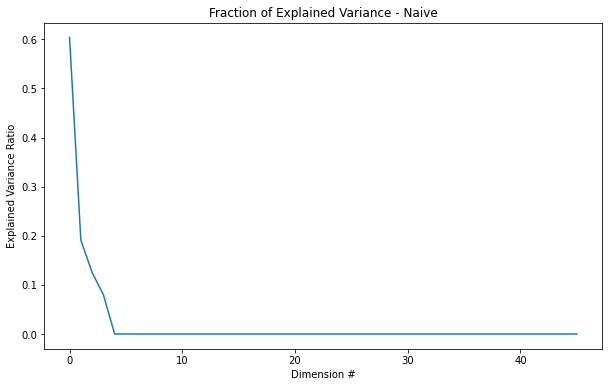

In [699]:
plot_naive_variance(pca_naive_laptops)

Observation:  The first 3 components account for approx 88% of the variance

In [700]:
scaled_laptops = standardize(laptops)

In [893]:
# PCA Scaled approach - we keep only half of the 46 components
n_components = 23
pca_scaled_laptops = fit_pca(scaled_laptops, n_components=n_components)

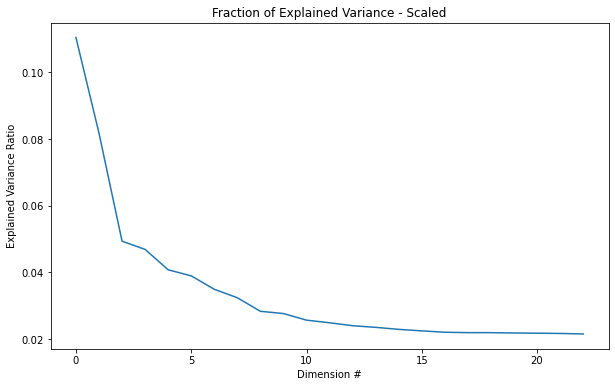

In [894]:
ax = plot_scaled_variance(pca_scaled_laptops)

In [895]:
scaled_laptops.shape[1]

46

In [896]:
reduced_laptops = reduce(pca_scaled_laptops, scaled_laptops)

In [897]:
reduced_laptops.shape[1]

23

In [898]:
pd.DataFrame(scaled_laptops).columns

RangeIndex(start=0, stop=46, step=1)

In [967]:
# Initialize the DBSCAN model
#dbscan_laptops = DBSCAN(eps=3, min_samples=50)
dbscan_laptops = DBSCAN(eps=4.5, min_samples=20)

In [968]:
# Build and Fit the DBSCAN model
#y_dbscan = dbscan_laptops.fit_predict(reduced_laptops)
y_dbscan = dbscan_laptops.fit_predict(scaled_laptops)

In [970]:
# Print unique counts
unique, counts = np.unique(dbscan_laptops.labels_, return_counts=True)
print (np.asarray((unique, counts)).T)

[[  -1  189]
 [   0 1011]
 [   1   58]
 [   2   45]]


In [971]:
#len(dbscan_laptops.labels_)

In [972]:
# Dump components relations with features:
#print(pd.DataFrame(pca_scaled_laptops.components_, columns=pd.DataFrame(scaled_laptops).columns, index = list(range(8))))


In [973]:
df = pd.DataFrame(dbscan_laptops.labels_, columns = ['DBSCAN Label'])

In [974]:
laptops2 = laptops2.drop('DBSCAN Label',axis=1)

In [975]:
laptops2 = pd.concat([laptops2, df], axis=1, join='inner')

Text(0, 0.5, 'Price in $')

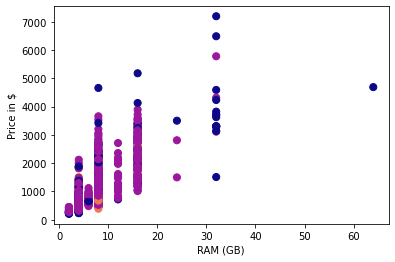

In [977]:
plt.scatter(laptops2['Ram'], laptops2['Price_dollars'], c=y_dbscan, s=50, cmap='plasma')
plt.xlabel("RAM (GB)")
plt.ylabel("Price in $")

In [978]:
# DBSCAN Cluster 0
laptops2[laptops2['DBSCAN Label'] == 0]['Price_dollars'].mean()


1309.371909000989

In [997]:
laptops2[laptops2['DBSCAN Label'] == 0]['Ram'].min()

2

In [998]:
laptops2[laptops2['DBSCAN Label'] == 0]['Ram'].max()

32

In [987]:
# DBSCAN Cluster 1
laptops2[laptops2['DBSCAN Label'] == 1]['Price_dollars'].mean()

648.6034482758621

In [995]:
laptops2[laptops2['DBSCAN Label'] == 1]['Ram'].min()

4

In [996]:
laptops2[laptops2['DBSCAN Label'] == 1]['Ram'].max()

16

In [991]:
# DBSCAN Cluster 2
laptops2[laptops2['DBSCAN Label'] == 2]['Price_dollars'].mean()

1452.2444444444445

In [989]:
laptops2[laptops2['DBSCAN Label'] == 2]['Ram'].max()

16

In [990]:
# DBSCAN Cluster -1
laptops2[laptops2['DBSCAN Label'] == -1]['Price_dollars'].mean()

1588.915343915344

In [992]:
laptops2[laptops2['DBSCAN Label'] == -1]['Ram'].max()

64

In [1015]:
laptops2[(laptops2['KMeans Label'] == 0) & (laptops2['Price_dollars'] < 600) & (laptops2['Ram'] > 4)][['Product','Price_dollars','Ram']].sort_values(by=['Price_dollars','Ram'],ascending = False)

,Product,Price_dollars,Ram
18,IdeaPad 320-15IKB,588,8
298,IdeaPad 310-15ABR,588,6
120,Spin 3,565,6
313,ES1-523-84K7 (A8-7410/8GB/256GB/FHD/W10),553,8
421,LapBook 12.3,529,6


In [1018]:
laptops2[(laptops2['KMeans Label'] == 0) & (laptops2['Price_dollars'] < 1500) & (laptops2['Ram'] >= 16)][['Product','Price_dollars','Ram']].sort_values(by=['Price_dollars','Ram'],ascending = False)

,Product,Price_dollars,Ram
123,Probook 470,1499,16
494,Rog G752VL-UH71T,1497,24
110,VivoBook S15,1489,16
150,Inspiron 5577,1474,16
513,Inspiron 5570,1438,16
1104,Legion Y520-15IKBN,1414,16
92,Probook 430,1412,16
770,Inspiron 5567,1393,16
288,Legion Y520-15IKBN,1391,16
1186,Inspiron 5578,1391,16


In [1019]:
laptops2[(laptops2['KMeans Label'] == 0) & (laptops2['Price_dollars'] < 5000) & (laptops2['Ram'] >= 32)][['Product','Price_dollars','Ram']].sort_values(by=['Price_dollars','Ram'],ascending = False)

,Product,Price_dollars,Ram
1066,ROG G701VO,4690,64
238,ROG G703VI-E5062T,4590,32
780,Alienware 17,4234,32
1081,IdeaPad Y900-17ISK,3823,32
968,Alienware 17,3715,32
841,Alienware 17,3626,32
972,Alienware 17,3304,32
177,GT80S 6QF-074US,3302,32
491,Portege X30-D-10L,3302,32
650,ROG G701VI,3302,32
